11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (

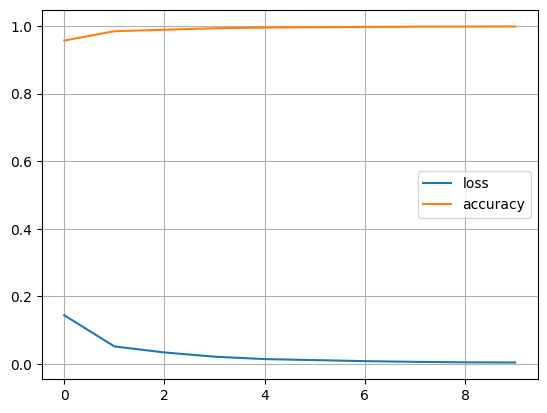

In [6]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar conjunto de mdatos MNIST
minist = keras.datasets.mnist

# Cargar la división de entranamiento y pruebas del conjunto de datos
(training_images, training_labels), (test_images, test_labels) = minist.load_data()

# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

# Construir el modelo de calsificación
model = keras.Sequential([
    # agregar convoluciones y maxpooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    # agregar las mismas capas que antes
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print('Perdida en el conjunto de prueba: ', loss)
print('Precisión en el conjunto de prueba: ', accuracy)

#predict
index = 1
print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'classification: \n {classification.reshape(-1,1)}')



In [7]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [8]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25
print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: 0
Label: 0
Label: 0


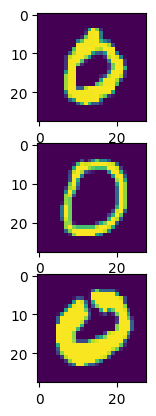

In [9]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE].reshape(28,28))
axarr[1].imshow(test_images[SECOND_IMAGE].reshape(28,28))
axarr[2].imshow(test_images[THIRD_IMAGE].reshape(28,28))

1/1 [==============================] - 0s 108ms/step


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

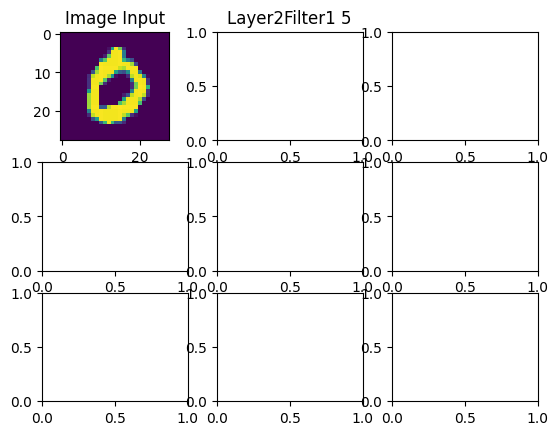

In [22]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28))
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title("Layer"+str(layer) + "Filter1 "+str(filter1))
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer) + "Filter2 "+str(filter2))
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28))
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])


1/1 [==============================] - 0s 36ms/step


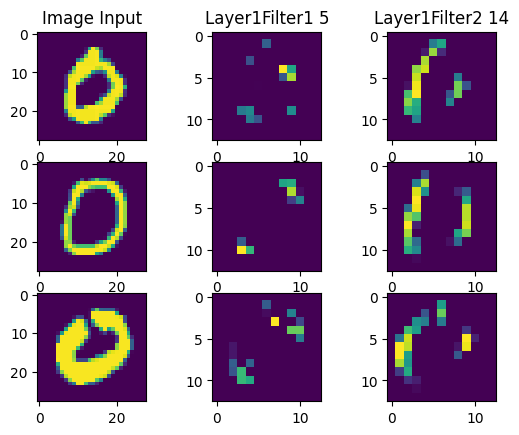

In [27]:
layer = 1
filter1 = 5
filter2 = 14

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28,28))
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title("Layer"+str(layer) + "Filter1 "+str(filter1))
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer) + "Filter2 "+str(filter2))
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28,28))
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])